# <center>INCOME PREDICTION OF A PERSON</center>

### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### READING THE FILE 

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### CHANGING COLUMN NAMES

In [3]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
df.columns=['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### REMOVING UNWANTED COLUMNS

In [6]:
df.shape

(32560, 15)

In [7]:
#Sunce we already have a column as education_num which represents the education but in numbers we can delete the education column
df.drop(['marital_status','relationship','native_country','Education'],axis=1,inplace=True)
df.head()

,Age,Workclass,Fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,hours_per_week,income
0,50,Self-emp-not-inc,83311,13,Exec-managerial,White,Male,0,0,13,<=50K
1,38,Private,215646,9,Handlers-cleaners,White,Male,0,0,40,<=50K
2,53,Private,234721,7,Handlers-cleaners,Black,Male,0,0,40,<=50K
3,28,Private,338409,13,Prof-specialty,Black,Female,0,0,40,<=50K
4,37,Private,284582,14,Exec-managerial,White,Female,0,0,40,<=50K


In [8]:
df.shape

(32560, 11)

### CHECKING FOR NULL VALUES

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
education_num     0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income            0
dtype: int64

### CHECKING FOR DATA TYPES AND CHANGING THEM

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
education_num      int64
occupation        object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
income            object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder()

In [13]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df['occupation']=df['occupation'].str.replace('?','Others',regex=True)
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Others               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
df['occupation']=lb.fit_transform(df['occupation'])
df['occupation'].value_counts()

10    4140
2     4099
3     4066
0     3769
12    3650
7     3295
6     2002
8     1843
14    1597
5     1370
4      994
13     928
11     649
9      149
1        9
Name: occupation, dtype: int64

In [16]:
df['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [17]:
df['race']=lb.fit_transform(df['race'])
df['race'].value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64

In [18]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [19]:
df['sex']=lb.fit_transform(df['sex'])
df['sex'].value_counts()

1    21789
0    10771
Name: sex, dtype: int64

In [20]:
df['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [21]:
df['income']=lb.fit_transform(df['income'])
df['income'].value_counts()

0    24719
1     7841
Name: income, dtype: int64

In [22]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [23]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Others',regex=True)
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Others               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [24]:
df['Workclass']=lb.fit_transform(df['Workclass'])
df['Workclass'].value_counts()

4    22696
6     2541
1     2093
3     1836
7     1297
5     1116
0      960
8       14
2        7
Name: Workclass, dtype: int64

### PLOTTING A BAR GRAPH

Text(0.5, 1.0, 'Income Count')

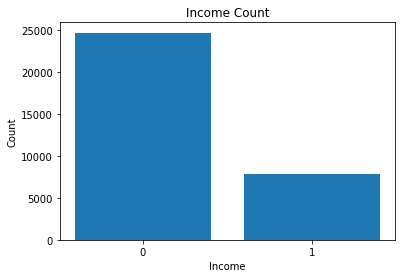

In [25]:
r1=df['income'].value_counts()
plt.bar(r1.index,r1)
plt.xticks(r1.index)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Count')

### SELECTING THE DEPENDENT AND INDEPENDENT VARIABLES

In [26]:
x=df.drop('income',axis=1)
y=df['income']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(32560, 10)
(32560,)


### SPLITTING THE MODEL INTO TRAIN AND TEST DATA 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24420, 10)
(8140, 10)
(24420,)
(8140,)


### MODEL GENERATION

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
def gen_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training Score: ',model.score(x_train,y_train))
    print('Testing Score: ',model.score(x_test,y_test))
    ypred=model.predict(x_test)
    global cm
    cm=confusion_matrix(y_test,ypred)
    print('\nConfusion Matrix:\n',cm)
    print('\nClassification Report:\n',classification_report(y_test,ypred))

### IMPORTING LIBRARIES

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### FUNCTION FOR VALIDATING RESULTS FROM CLASSIFICATION REPORT 

In [32]:
def val_res(p):
    precision0=p[0][0]/(p[0][0]+p[1][0])
    precision1=p[1][1]/(p[1][1]+p[0][1])
    recall0=p[0][0]/(p[0][0]+p[0][1])
    recall1=p[1][1]/(p[1][1]+p[1][0])
    f1s0=2*precision0*recall0/(precision0+recall0)
    f1s1=2*precision1*recall1/(precision1+recall1)
    acc=(p[0][0]+p[1][1])/(p[0][0]+p[0][1]+p[1][0]+p[1][1])
    mp=(p[0][1]+p[1][0])/(p[0][0]+p[0][1]+p[1][0]+p[1][1])
    print('Precision for 0: ',precision0)
    print('Precision for 1: ',precision1)
    print('Recall for 0: ',recall0)
    print('Recall for 1: ',recall1)
    print('F1-Score for 0: ',f1s0)
    print('F1-Score for 1: ',f1s1)
    print('Accuracy: ',acc)
    print('Misclassification Percentage: ',mp)

### LOGISTIC REGRESSION

In [33]:
m1=LogisticRegression()
gen_model(m1,x_train,x_test,y_train,y_test)

Training Score:  0.7972972972972973
Testing Score:  0.8001228501228501

Confusion Matrix:
 [[5987  170]
 [1457  526]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6157
           1       0.76      0.27      0.39      1983

    accuracy                           0.80      8140
   macro avg       0.78      0.62      0.64      8140
weighted avg       0.79      0.80      0.76      8140



In [34]:
val_res(cm)

Precision for 0:  0.8042718968296615
Precision for 1:  0.7557471264367817
Recall for 0:  0.9723891505603378
Recall for 1:  0.2652546646495209
F1-Score for 0:  0.8803764429086097
F1-Score for 1:  0.3926838372527063
Accuracy:  0.8001228501228501
Misclassification Percentage:  0.19987714987714988


#### HYPERPARAMETER TUNING (DECISION TREE)

In [35]:
dt1=DecisionTreeClassifier()
params_dt={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8],'min_samples_split':[10,11,12,13,14,15,16,17,18,20]}
rscv1=RandomizedSearchCV(estimator=dt1,param_distributions=params_dt,scoring='accuracy',cv=5)
rscv1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [10, 11, 12, 13,
                                                              14, 15, 16, 17,
                                                              18, 20]},
                   scoring='accuracy')

In [36]:
print(rscv1.best_params_)
print(rscv1.best_estimator_)
print(rscv1.best_score_)

{'min_samples_split': 18, 'max_depth': 6, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=6, min_samples_split=18)
0.836773136773137


### DECISION TREE MODEL

In [37]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=18)
gen_model(m2,x_train,x_test,y_train,y_test)

Training Score:  0.8408681408681409
Testing Score:  0.8356265356265357

Confusion Matrix:
 [[5741  416]
 [ 922 1061]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      6157
           1       0.72      0.54      0.61      1983

    accuracy                           0.84      8140
   macro avg       0.79      0.73      0.75      8140
weighted avg       0.83      0.84      0.83      8140



In [38]:
val_res(cm)

Precision for 0:  0.8616238931412277
Precision for 1:  0.7183480027081923
Recall for 0:  0.9324346272535325
Recall for 1:  0.535047907211296
F1-Score for 0:  0.8956318252730109
F1-Score for 1:  0.6132947976878612
Accuracy:  0.8356265356265357
Misclassification Percentage:  0.16437346437346437


### HYPERPARAMETER TUNING (RANDOM FOREST)

In [39]:
rf=RandomForestClassifier()
params_rf={'n_estimators':[50,60,70,80,90,100],'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8],'min_samples_split':[10,11,12,13,14,15,16,17,18,20]}
rscv2=RandomizedSearchCV(estimator=rf,param_distributions=params_rf,scoring='accuracy',cv=5)
rscv2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [10, 11, 12, 13,
                                                              14, 15, 16, 17,
                                                              18, 20],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100]},
                   scoring='accuracy')

In [40]:
print(rscv2.best_params_)
print(rscv2.best_estimator_)
print(rscv2.best_score_)

{'n_estimators': 100, 'min_samples_split': 18, 'max_depth': 7, 'criterion': 'gini'}
RandomForestClassifier(max_depth=7, min_samples_split=18)
0.8431203931203932


### RANDOM FOREST MODEL

In [41]:
m3=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=7,min_samples_split=18)
gen_model(m3,x_train,x_test,y_train,y_test)

Training Score:  0.846027846027846
Testing Score:  0.8407862407862408

Confusion Matrix:
 [[5919  238]
 [1058  925]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6157
           1       0.80      0.47      0.59      1983

    accuracy                           0.84      8140
   macro avg       0.82      0.71      0.74      8140
weighted avg       0.84      0.84      0.83      8140



In [42]:
val_res(cm)

Precision for 0:  0.848358893507238
Precision for 1:  0.7953568357695615
Recall for 0:  0.961344810784473
Recall for 1:  0.4664649520927887
F1-Score for 0:  0.9013248058474189
F1-Score for 1:  0.5880483153210425
Accuracy:  0.8407862407862408
Misclassification Percentage:  0.15921375921375922


### HYPERPARAMETER TUNING (SVM)

In [43]:
svc=SVC()
params_svm={'C':[0.0001,0.001,0.01,1,10],'gamma':[0.0001,0.001,0.01,1,10],'degree':[1,2,3,4,5]}
rscv4=RandomizedSearchCV(estimator=svc,param_distributions=params_svm,scoring='accuracy',cv=5)
rscv4.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 1, 10],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 1, 10]},
                   scoring='accuracy')

In [44]:
print(rscv4.best_params_)
print(rscv4.best_estimator_)
print(rscv4.best_score_)

{'gamma': 10, 'degree': 1, 'C': 0.001}
SVC(C=0.001, degree=1, gamma=10)
0.7601146601146601


### SVC MODEL

In [45]:
m5=SVC(kernel='linear',C=0.001,gamma=10,degree=1)
gen_model(m5,x_train,x_test,y_train,y_test)

Training Score:  0.7937755937755938
Testing Score:  0.8003685503685504

Confusion Matrix:
 [[5879  278]
 [1347  636]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      6157
           1       0.70      0.32      0.44      1983

    accuracy                           0.80      8140
   macro avg       0.75      0.64      0.66      8140
weighted avg       0.78      0.80      0.77      8140



In [46]:
val_res(cm)

Precision for 0:  0.8135898145585386
Precision for 1:  0.6958424507658644
Recall for 0:  0.9548481403280819
Recall for 1:  0.3207261724659607
F1-Score for 0:  0.8785772995591422
F1-Score for 1:  0.43907490507421465
Accuracy:  0.8003685503685504
Misclassification Percentage:  0.19963144963144963


### HYPERPARAMETER TUNING (KNN)

In [47]:
knn=KNeighborsClassifier()
params_knn={'n_neighbors':list(range(3,50,2))}
rscv3=RandomizedSearchCV(estimator=knn,param_distributions=params_knn,scoring='accuracy',cv=5)
rscv3.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21, 23, 25, 27,
                                                        29, 31, 33, 35, 37, 39,
                                                        41, 43, 45, 47, 49]},
                   scoring='accuracy')

In [48]:
print(rscv3.best_params_)
print(rscv3.best_estimator_)
print(rscv3.best_score_)

{'n_neighbors': 21}
KNeighborsClassifier(n_neighbors=21)
0.798034398034398


### KNN MODEL

In [49]:
m4=KNeighborsClassifier(n_neighbors=21)
gen_model(m4,x_train,x_test,y_train,y_test)

Training Score:  0.8033988533988534
Testing Score:  0.7987714987714988

Confusion Matrix:
 [[6072   85]
 [1553  430]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      6157
           1       0.83      0.22      0.34      1983

    accuracy                           0.80      8140
   macro avg       0.82      0.60      0.61      8140
weighted avg       0.81      0.80      0.75      8140



In [50]:
val_res(cm)

Precision for 0:  0.796327868852459
Precision for 1:  0.8349514563106796
Recall for 0:  0.986194575280169
Recall for 1:  0.2168431669188099
F1-Score for 0:  0.8811493252067915
F1-Score for 1:  0.344275420336269
Accuracy:  0.7987714987714988
Misclassification Percentage:  0.20122850122850122


# <center>RANDOM FOREST IS THE BEST PERFORMING MODEL <br>AS IT HAS THE BEST ACCURACY</center>